<a href="https://colab.research.google.com/github/Suraj-chauhan-06/Python_Project/blob/main/website_performance_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/data-export (1) (1).csv")

In [11]:
print(df.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

In [13]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group","Datehour","User","Sessions","Enagaged Session","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [ ]:
print(df.head())

    Channel Group    Datehour User Sessions Enagaged Session  \
0          Direct  2024041623  237      300              144   
1  Organic Social  2024041719  208      267              132   
2          Direct  2024041723  188      233              115   
3  Organic Social  2024041718  187      256              125   
4  Organic Social  2024041720  175      221              112   

  Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3                         32.16015625        0.6684491978609630   
4                  46.918552036199100                      0.64   

  Events per session           Engagement rate Event count  
0       4.673333333333330                 0.48        1402  
1       4.295880149812730   0.4943820224719100        1147  
2       4.587982832618030  0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   User                                 3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Enagaged Session                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [68]:
df["Datehour"] = pd.to_datetime(df["Datehour"], format = "%Y%m%d%H" ,errors='coerce')
numeric_cols = df.columns.drop(["Channel Group","Datehour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["hour"] = df["Datehour"].dt.hour

In [69]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   User                                 3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Enagaged Session                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hour        

,Channel Group,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [ ]:
df.describe()

,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


**Session And User Over Time**

In [ ]:
sns.set(style = "whitegrid")

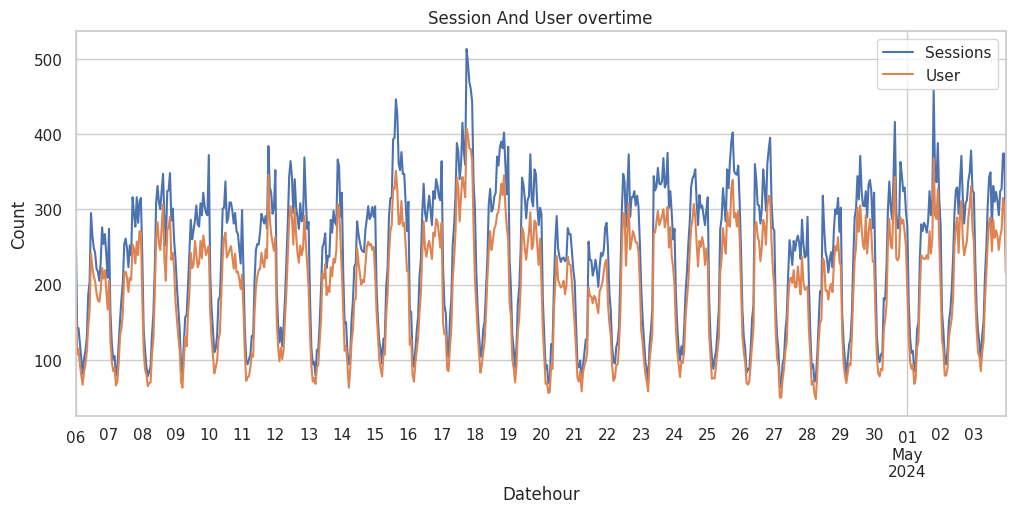

In [ ]:
plt.figure(figsize = (12,5))
df.groupby("Datehour") [["Sessions","User"]].sum().plot(ax=plt.gca())
plt.title("Session And User overtime")
plt.xlabel("Datehour")
plt.ylabel("Count")
plt.show()

**Total User By Channel**

/tmp/ipython-input-42-185612048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df , x="Channel Group" , y="User",estimator = np.sum,palette="viridis")


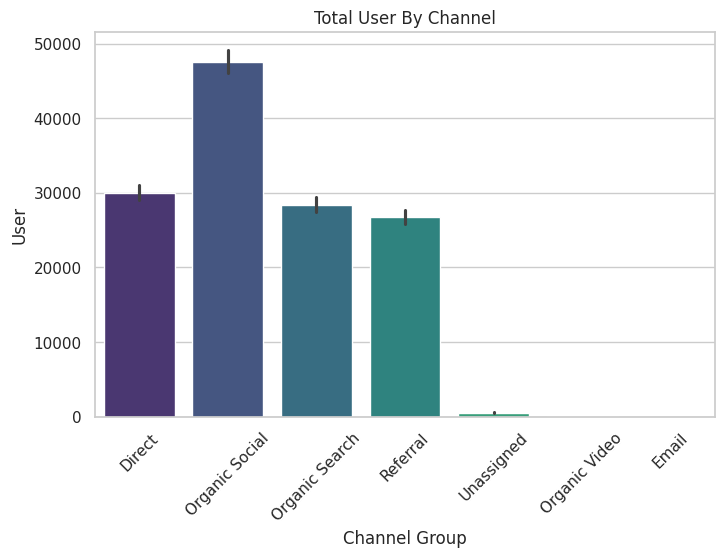

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(data=df , x="Channel Group" , y="User",estimator = np.sum,palette="viridis")
plt.title("Total User By Channel")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.head()

,Channel Group,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


**Average Engagement Time** **By Channel**

/tmp/ipython-input-25-1473454875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df ,x="Channel Group" , y="Average engagement time per session",estimator = np.mean,palette="magma")


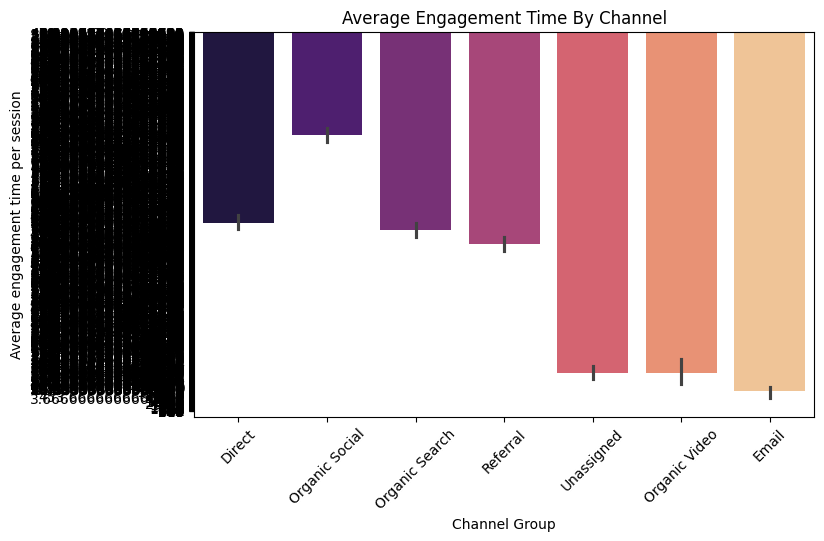

In [25]:
plt.figure(figsize =(8,5))
sns.barplot(data=df ,x="Channel Group" , y="Average engagement time per session",estimator = np.mean,palette="magma")
plt.title("Average Engagement Time By Channel")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.head()

,Channel Group,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


**Engagement Rate Distribution By Channel**

/tmp/ipython-input-24-1287194308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df ,x="Channel Group",y="Engagement rate",palette="coolwarm")


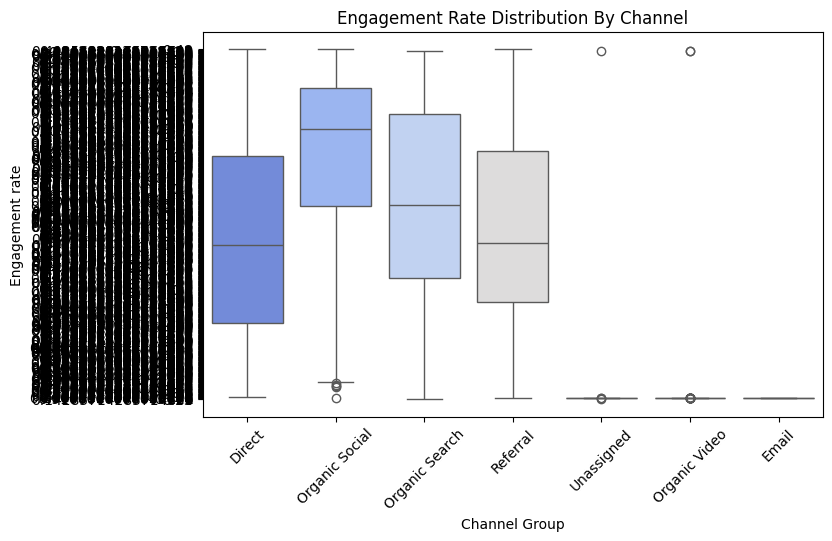

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df ,x="Channel Group",y="Engagement rate",palette="coolwarm")
plt.title("Engagement Rate Distribution By Channel")
plt.xticks(rotation = 45)
plt.show()

**Engaged VS Non Engaged Sessions**

In [26]:
df.head()

,Channel Group,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


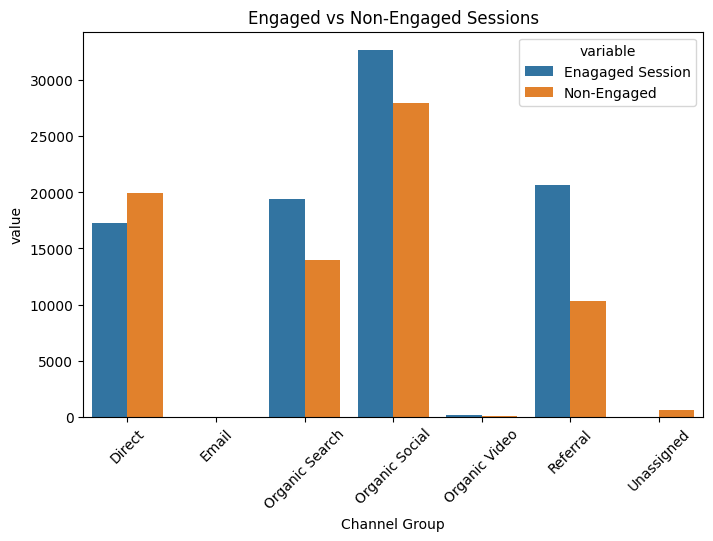

In [48]:
df["Sessions"] = pd.to_numeric(df["Sessions"], errors='coerce')
df["Enagaged Session"] = pd.to_numeric(df["Enagaged Session"], errors='coerce')


session_df = df.groupby("Channel Group")[["Sessions", "Enagaged Session"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Enagaged Session"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Enagaged Session", "Non-Engaged"])


plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


**Traffic By Hour And Channel**

In [67]:
heatmap_data = df.groupby(["hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("🔵 Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


KeyError: 'hour'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


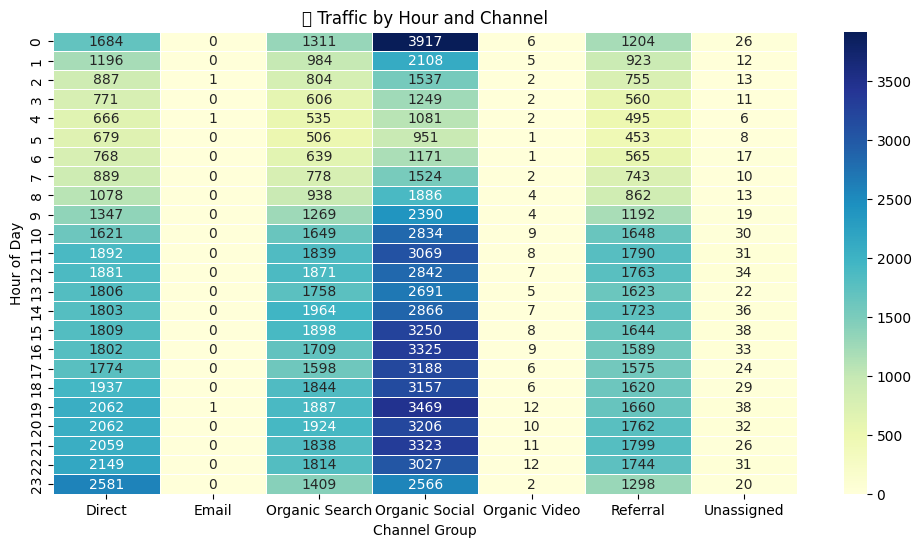

In [70]:
heatmap_data = df.groupby(["hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("🔵 Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

**Engagement Rate VS Session Over Time**

In [71]:
df.head()

,Channel Group,Datehour,User,Sessions,Enagaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


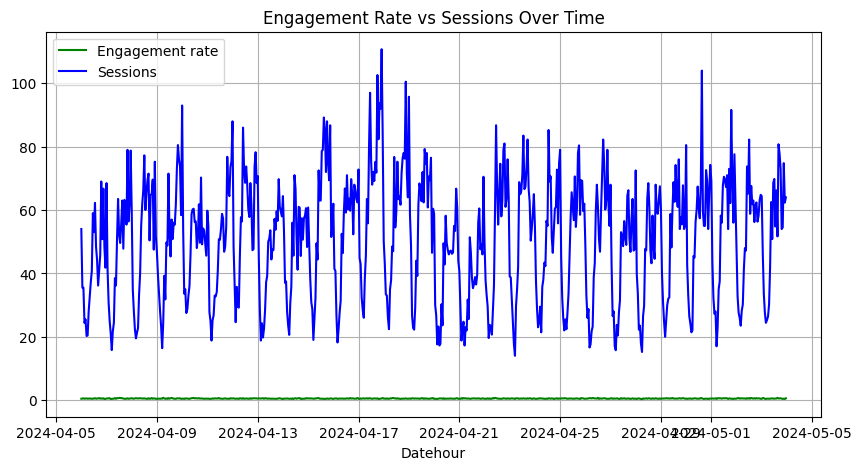

In [75]:
df_plot = df.groupby("Datehour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["Datehour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["Datehour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("Datehour")
plt.legend()
plt.grid(True)
plt.show()
